# Try Plotly 
+ Tutorials: 
  + [Creating and Updating Figures in Python](https://plot.ly/python/creating-and-updating-figures/)
  + [Plotly User Guide in Python/v3](https://plot.ly/python/v3/user-guide/)
+ Graphing Library
  + [Plotly Python Open Source Graphing Library](https://plot.ly/python/)
  + [Plotly Python Open Source Graphing Library for Pandas](https://plot.ly/pandas/)
+ References:
  + [`python` figure reference](https://plot.ly/python/reference/)


In [1]:
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

In [2]:
iris = px.data.iris()
iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

In [3]:
tips = px.data.tips()
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

## Different Ways to Plotly
+ `plotly.io`
+ `plotyly.graph_objects`
+ `plotly.express`

In [4]:
# using dict()
tmp = []
for species in iris.species.unique():
    tmp.append(dict(type='scatter', name=species, mode='markers',
                    x=iris[iris.species == species].sepal_width, 
                    y=iris[iris.species == species].sepal_length, 
                    textposition='middle center', 
                    hoverinfo='x+y+text', 
                    marker={'symbol': 0}))
# tmp

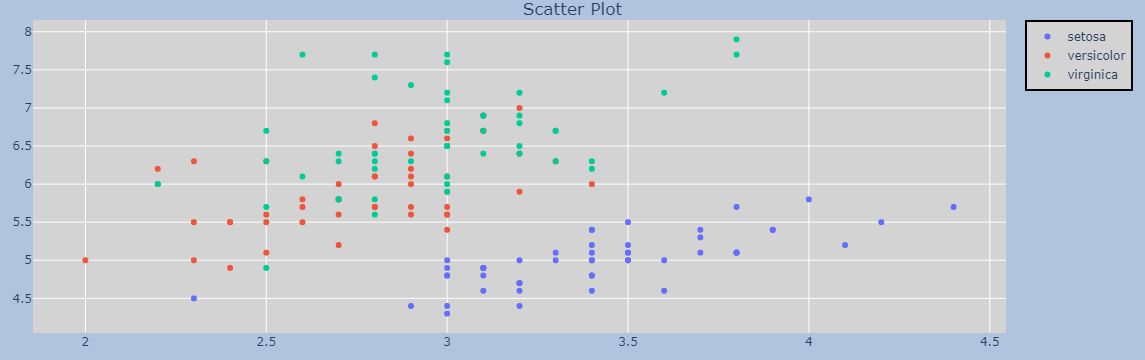

In [5]:
# using pio, python dictionary way
# using list comprehension and dict(), or you can add each trace manually
fig = {'data': [dict(type='scatter', name=species, mode='markers',
                    x=iris[iris.species == species].sepal_width, 
                    y=iris[iris.species == species].sepal_length, 
                    textposition='middle center', 
                    hoverinfo='x+y+text', 
                    marker={'symbol': 0})
                for species in iris.species.unique()
               ], 
       'layout':  {"title": {'text': 'Scatter Plot', 
                            'x': 0.5, 'y': 1,  # set title position
                            'xanchor': 'auto', 'yanchor': 'auto', # set title alignment
                            'pad': {'t': 3, 'b': 3} # set title padding, top, bottom, left
                           },
                  "showlegend": True,  # show legend or not, if more than 1, default=True
                  "legend": {'bgcolor': 'lightgray', # legend area background
                             'bordercolor': 'black', 'borderwidth': 2, # legend area border
                             'x': 1.02, 'y': 1, # legend area horizontal and vertical position
                            }, 
                  "margin": {'l': 20, 'r': 20, 't': 20, 'b': 20},  
                  "width": 600, "height": 300,  # set plot width and height
                  "paper_bgcolor": "LightSteelBlue",  # set plot paper color
                  "plot_bgcolor": 'LightGray', # set plot color between x and y axis
                 }}
pio.show(fig)

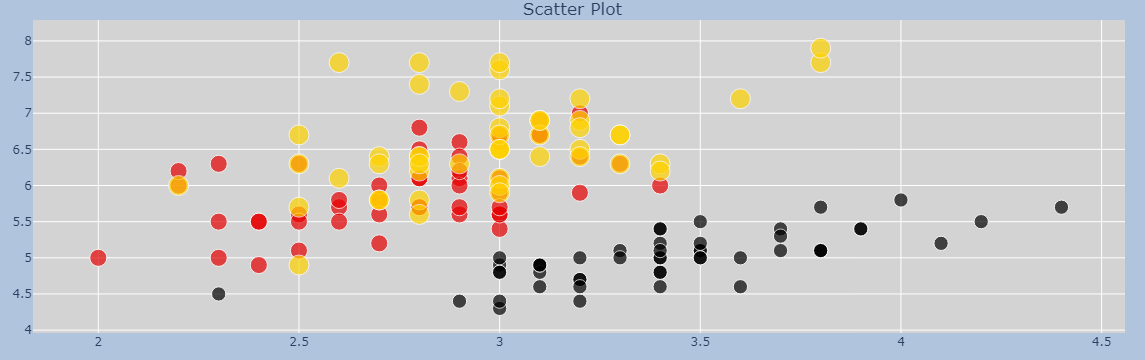

In [6]:
# using pio, javascript way
fig = {"data": [{"type": "scatter",
                 "visible": True, # set trace to be visible (default)
                 "legendgroup": '',  # set trance's legend group
                 "opacity": 1, # set trace opacity value
                 "mode": 'markers',
                 "x": iris.sepal_width,
                 "y": iris.sepal_length,
                 "text": iris.species, # show when hover over
                 "textposition": 'middle center', 
                 "hoverinfo": 'x+y+text', # show the coordinates and species in each hover box
                 
                 "marker": {"symbol": 0,  # set marker type
                            "size": (iris.species.astype('category').cat.codes.values*2)+10, # marker by diff size
                            "sizeref": .7, # size reference, but not sure how???
                            "color": iris.species.astype('category').cat.codes.values, # set marker color
                            "cmin": 0, "cmax": 3, # set marker min and max (chagne marker color)
                            "colorscale": 'Hot', # set color scale, or color palette
                            "showscale": False, # show the color bar or not
                           }, 
                 "selected": {"marker": {"color": "black"}}, # set behavior when being selected
                }],
       
       "layout": {"title": {'text': 'Scatter Plot', 
                            'x': 0.5, 'y': 1,  # set title position
                            'xanchor': 'auto', 'yanchor': 'auto', # set title alignment
                            'pad': {'t': 3, 'b': 3} # set title padding, top, bottom, left
                           },
                  "legend": {'bgcolor': 'lightgray', # legend area background
                             'bordercolor': 'black', 'borderwidth': 2, # legend area border
                             'x': 1.02, 'y': 1, # legend area horizontal and vertical position
                            }, 
                  "margin": {'l': 20, 'r': 20, 't': 20, 'b': 20},  
                  "width": 600, "height": 300,  # set plot width and height
                  "paper_bgcolor": "LightSteelBlue",  # set plot paper color
                  "plot_bgcolor": 'LightGray', # set plot color between x and y axis
                 }
      }
pio.show(fig)

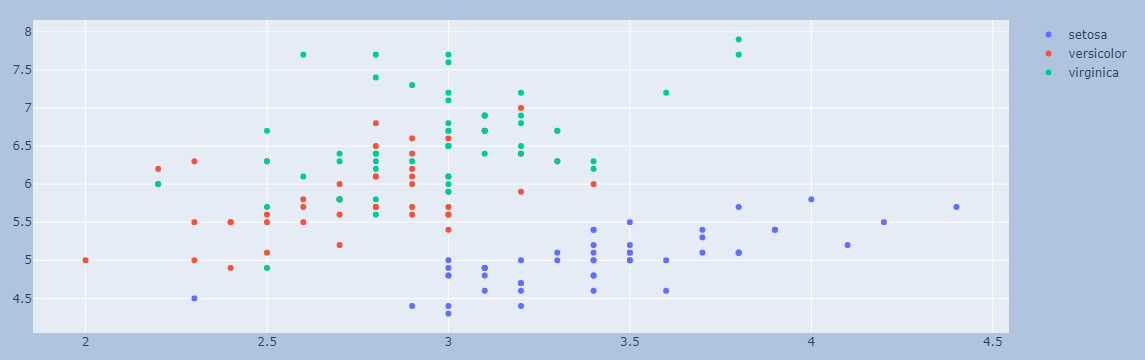

In [7]:
# using plotly graph objects
# need to add lengends
fig = go.Figure()
fig.add_trace(go.Scatter(x=iris[iris.species == 'setosa'].sepal_width, 
                         y=iris[iris.species == 'setosa'].sepal_length, 
                         mode='markers', name='setosa'))
fig.add_trace(go.Scatter(x=iris[iris.species == 'versicolor'].sepal_width, 
                         y=iris[iris.species == 'versicolor'].sepal_length, 
                         mode='markers', name='versicolor'))
fig.add_trace(go.Scatter(x=iris[iris.species == 'virginica'].sepal_width, 
                         y=iris[iris.species == 'virginica'].sepal_length, 
                         mode='markers', name='virginica'))
              
fig.update_layout(autosize=False, 
                  width=600, height=300, 
                  margin=dict(l=20, r=20, t=20, b=20),
                  paper_bgcolor="LightSteelBlue")
fig.show()

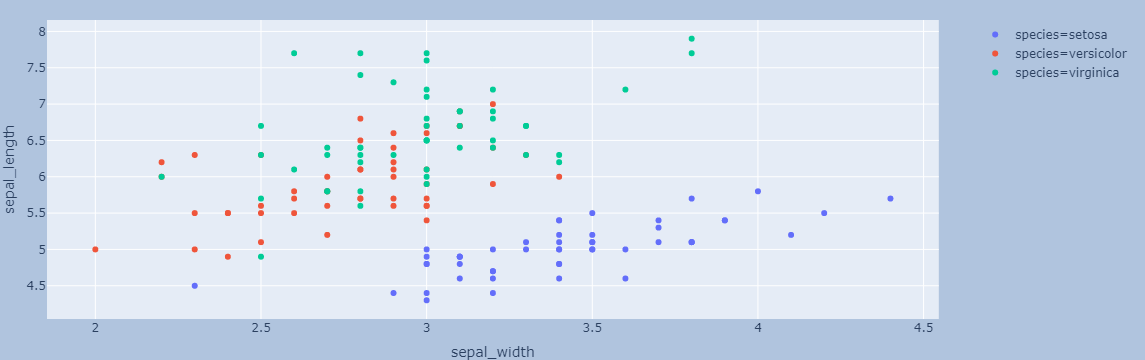

In [8]:
# using plotly express
iris = px.data.iris()
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species", \
                 width=600, height=300)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue")
fig.show()

## Subplots

In [9]:
from plotly.subplots import make_subplots

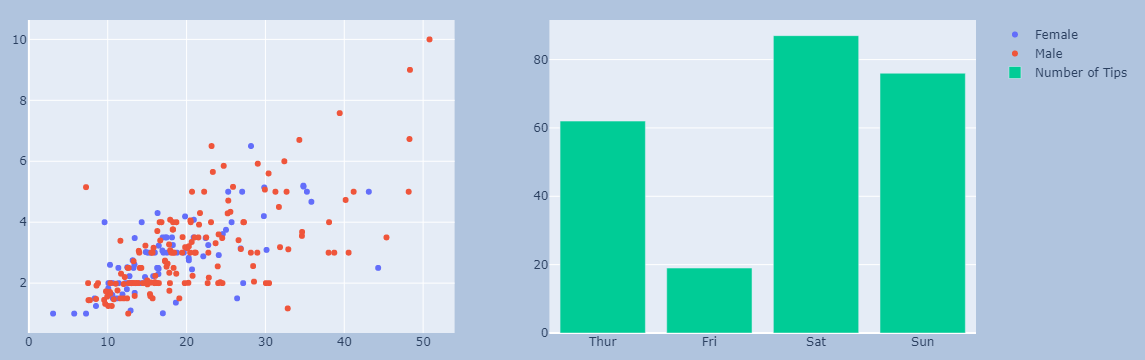

In [10]:
# make the subplots template
fig = make_subplots(rows=1, cols=2, )
# first subplot
for sex in tips.sex.unique(): 
    fig.add_trace(go.Scatter(x=tips[tips.sex==sex].total_bill, 
                             y=tips[tips.sex==sex].tip, 
                             mode="markers", name=sex), 
                  row=1, col=1)
# second subplot
# cannot find a way to set oder in histogram
fig.add_trace(go.Bar(x=['Thur', 'Fri', 'Sat', 'Sun'],
                     y=tips.day.value_counts().reindex(['Thur', 'Fri', 'Sat', 'Sun']), 
                     name='Number of Tips'), 
              row=1, col=2)

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=20, b=20),
                  paper_bgcolor="LightSteelBlue")

fig.show()

## Updating figures
+ `add_traces`
+ `add_scatter`
+ `add_bar`
+ `...`

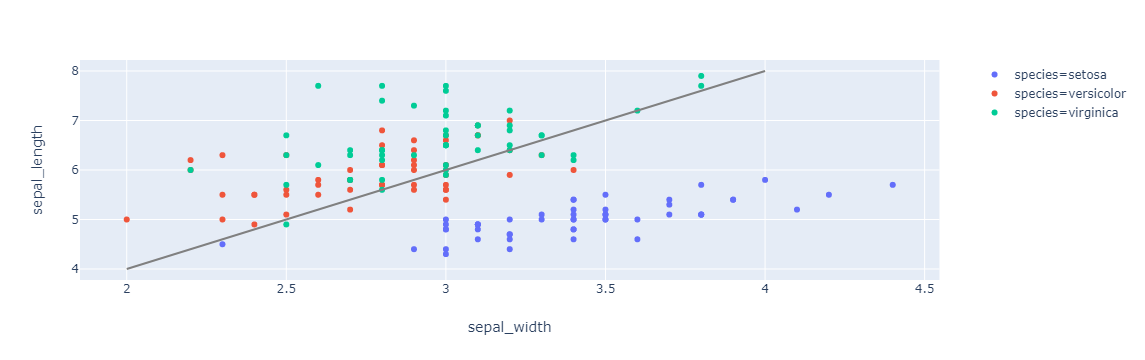

In [11]:
# scatter plot with express
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
# trend line with add_trace
fig.add_trace(go.Scatter(x=[2, 4], y=[4, 8],
                         mode="lines",
                         line=go.scatter.Line(color="gray"),
                         showlegend=False))
# set up plot layout
fig.update_layout(width=600, height=300)

fig.show()

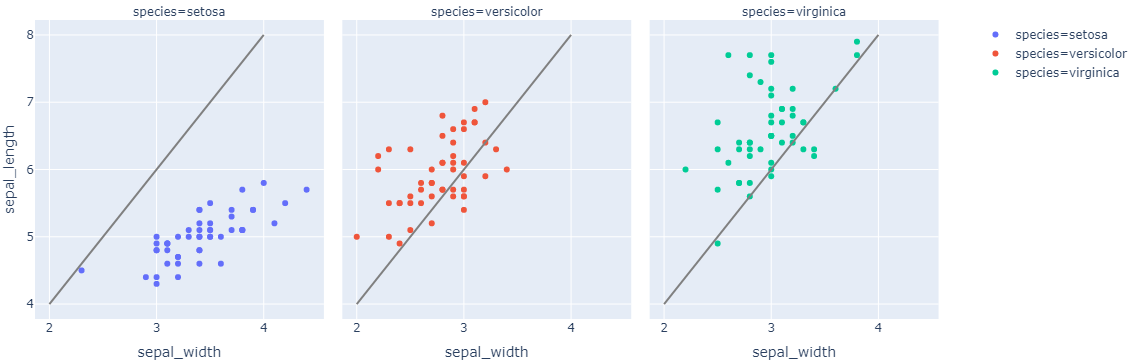

In [12]:
# create the figure
fig = px.scatter(iris, x="sepal_width", y="sepal_length", 
                 color="species", facet_col="species")
# create the reference line
reference_line = go.Scatter(x=[2, 4], y=[4, 8], mode="lines",
                            line=go.scatter.Line(color="gray"),
                            showlegend=False)
# add 3 line to each of the subplot, by specififying row and col
fig.add_trace(reference_line, row=1, col=1)
fig.add_trace(reference_line, row=1, col=2)
fig.add_trace(reference_line, row=1, col=3)

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=20, b=20))

fig.show()

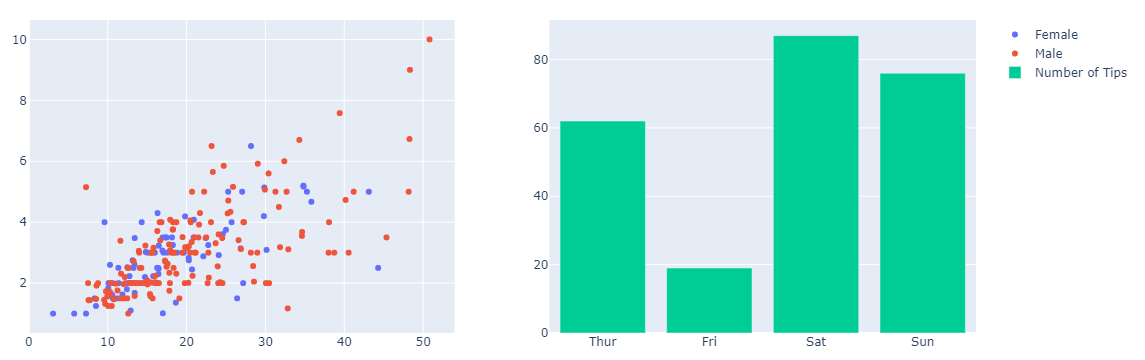

In [13]:
# add_scatter, add_bar instead of add_trace(go.Scatter())
fig = make_subplots(rows=1, cols=2)
# first subplot
for sex in tips.sex.unique(): 
    fig.add_scatter(x=tips[tips.sex==sex].total_bill, 
                    y=tips[tips.sex==sex].tip, 
                    mode="markers", name=sex,
                    row=1, col=1)
# second subplot
fig.add_bar(x=['Thur', 'Fri', 'Sat', 'Sun'],
            y=tips.day.value_counts().reindex(['Thur', 'Fri', 'Sat', 'Sun']), 
            name='Number of Tips',
            row=1, col=2)

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=20, b=20))

fig.show()

## Magic Underscore
+ `layout_title_text=A Chart"`, as `layout=dict(title=dict(text="A Chart"))`

In [14]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

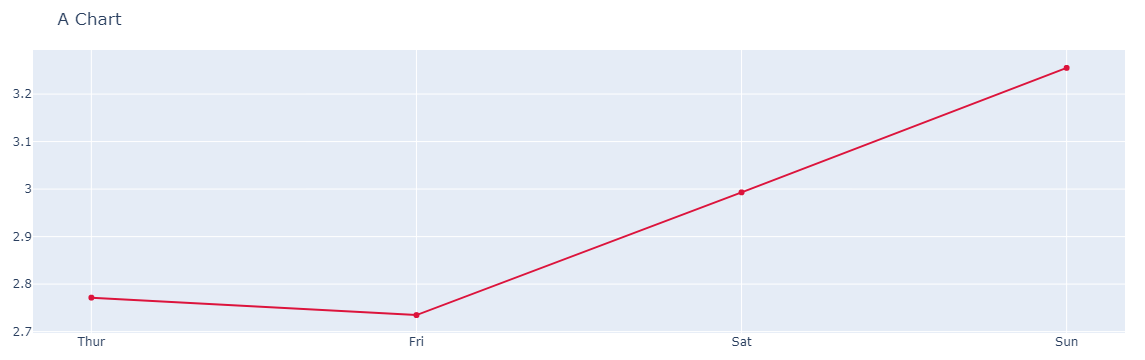

In [15]:
avg_tip = tips.groupby('day')[['tip']].mean().reindex(['Thur', 'Fri', 'Sat', 'Sun'])

fig = go.Figure(data=[go.Scatter(x=avg_tip.index, 
                                 y=avg_tip.tip, 
                                 line=dict(color="crimson"))],
                layout=dict(title=dict(text="A Chart")))
# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))
fig.show()

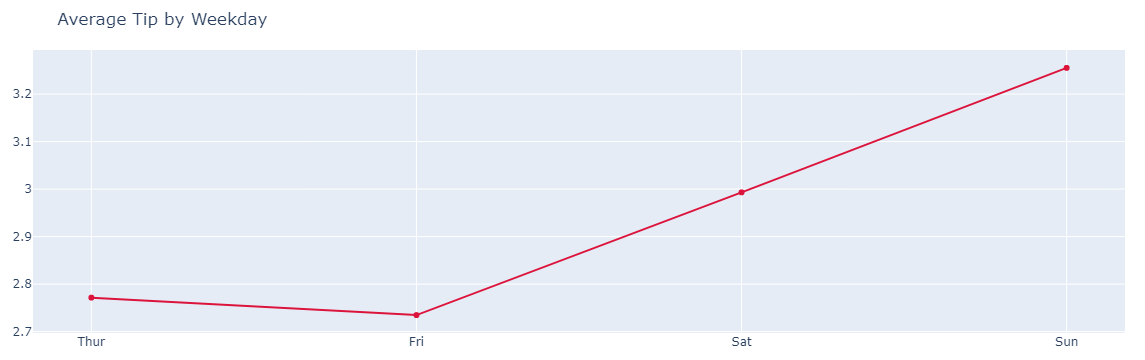

In [16]:
avg_tip = tips.groupby('day')[['tip']].mean().reindex(['Thur', 'Fri', 'Sat', 'Sun'])

fig = {'data': [{'type': 'scatter', 
                 'x': avg_tip.index, 
                 'y': avg_tip.tip, 
                 'line': {'color': 'crimson'}}],
       'layout': {'width': 600, 'height': 300, 
                  'title': {'text': 'Average Tip by Weekday'}, 
                  'margin': {'l': 20, 'r': 20, 't': 50, 'b': 20}}}
pio.show(fig)

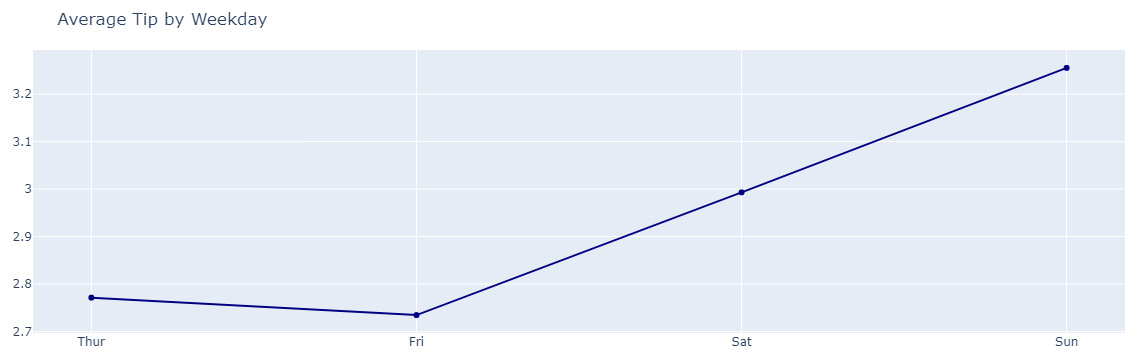

In [17]:
fig = go.Figure(data=[go.Scatter(x=avg_tip.index, y=avg_tip.tip, line_color="navy")],
                layout_title_text="Average Tip by Weekday") # magic underscore
# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))
fig.show()

## Update Layout

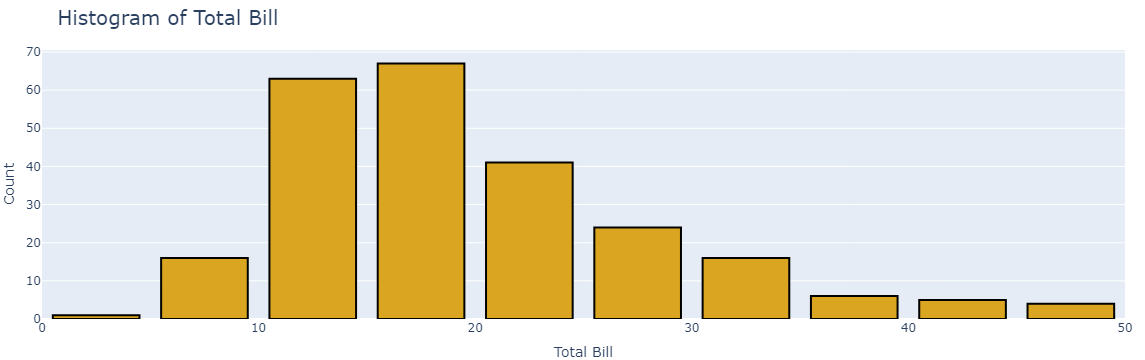

In [18]:
fig = go.Figure()
# using magic underscore: 
fig.add_trace(go.Histogram(x=tips.total_bill, histfunc='count', 
                           xbins=dict(start=0, end=50, size=5),
                           marker_line=dict(width=2, color='black'), 
                           marker_color='goldenrod', 
                           ))
# update layout with width, height, margin...etc
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20), 
                  bargap=.2,  # set the gap between two bars
                  xaxis=dict(title=dict(text='Total Bill')), 
                  yaxis_title_text='Count', 
                  title=dict(text="Histogram of Total Bill", font_size=20)
                  )
fig.show()

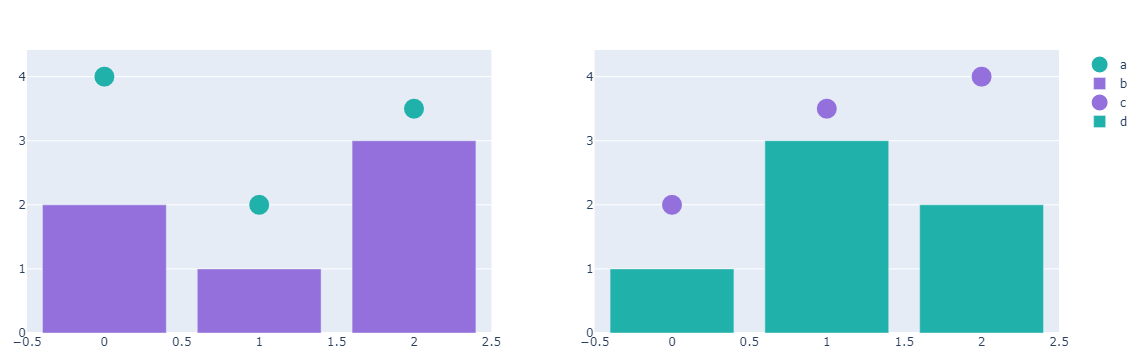

In [19]:
fig = make_subplots(rows=1, cols=2)
# similar to add trace, specifying which subplot
# two types of plots on the first graph
fig.add_scatter(y=[4, 2, 3.5], mode="markers",
                marker=dict(size=20, color="LightSeaGreen"),
                name="a", row=1, col=1)
fig.add_bar(y=[2, 1, 3],
            marker=dict(color="MediumPurple"),
            name="b", row=1, col=1)
# similar to add trace, 
# two types of plots on the second graph
fig.add_scatter(y=[2, 3.5, 4], mode="markers",
                marker_size=20, marker_color="MediumPurple",
                name="c", 
                row=1, col=2)
fig.add_bar(y=[1, 3, 2],
            marker_color="LightSeaGreen",
            name="d",
            row=1, col=2)

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))

fig.show()

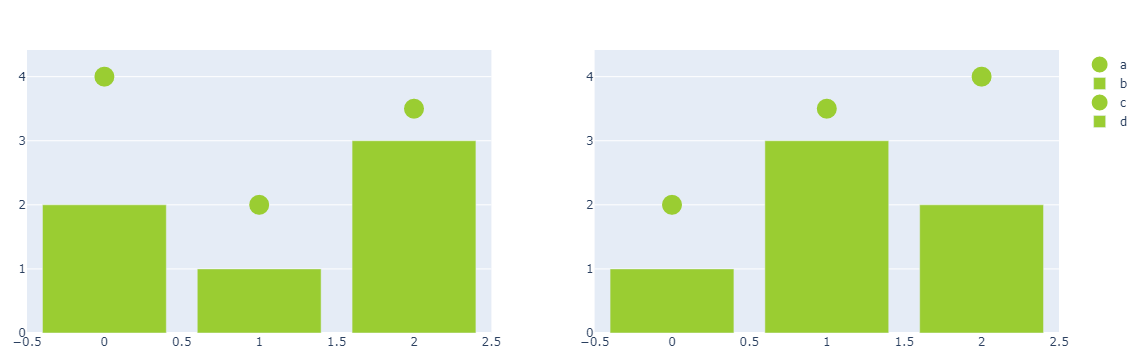

In [20]:
fig = make_subplots(rows=1, cols=2)
# note the mark.color property, specfied as dict 
fig.add_scatter(y=[4, 2, 3.5], mode="markers",
                marker=dict(size=20, color="LightSeaGreen"),
                name="a", row=1, col=1)
fig.add_bar(y=[2, 1, 3],
            marker=dict(color="MediumPurple"),
            name="b", row=1, col=1)

fig.add_scatter(y=[2, 3.5, 4], mode="markers",
                marker=dict(size=20, color="MediumPurple"),
                name="c", row=1, col=2)

fig.add_bar(y=[1, 3, 2],
            marker=dict(color="LightSeaGreen"),
            name="d", row=1, col=2)

# update_traces overwrite the previous setting in add_bar
fig.update_traces(marker=dict(color="yellowgreen"))

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))

fig.show()

## Update Traces
+ supports `selector` to control which traces should be updated

In [21]:
import numpy as np 

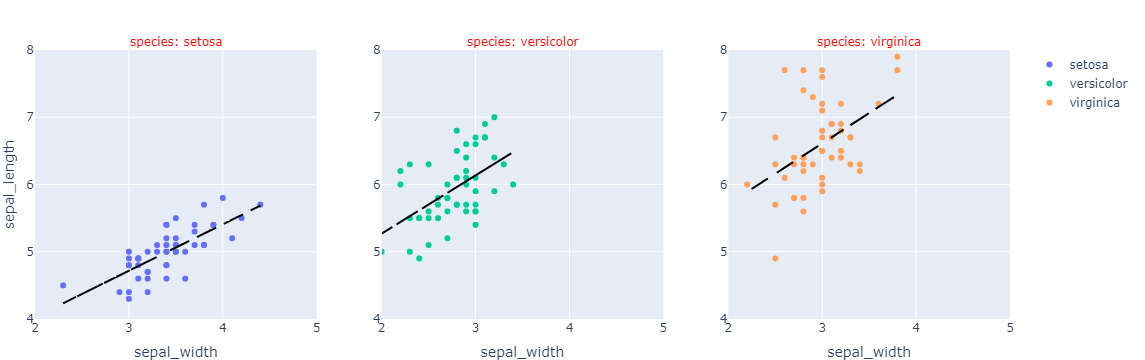

In [22]:
# updating the regression lines produced by plotly express as dotted style
# create the scatter plot, with a trend line
fig = make_subplots(rows=1, cols=3, 
                    subplot_titles=('species: setosa', 
                                    'species: versicolor', 
                                    'species: virginica'))
                    
# edit subplot titels font size
for i in fig['layout']['annotations']:
    i['font'] = dict(size=12, color='#ff0000')

for i, species in enumerate(iris.species.unique()):
    a = iris[iris.species == species].sepal_width.values
    b = iris[iris.species == species].sepal_length.values
    # add trace of each subplot
    fig.add_trace(go.Scatter(x=a, y=b, mode='markers', name=species),
                  row=1, col=i+1)
    
    # add trace of each trendline
    z = np.polyfit(a, b, deg=1) # 1d fitting, return coefficients
    p = np.poly1d(z) # 1d polynomial func, given the coefficients
    fig.add_trace(go.Scatter(x=a, y=p(a), mode='lines', showlegend=False), 
                  row=1, col=i+1)
    
# update the trendline
fig.update_traces(selector={'type': 'scatter', 'mode': 'lines'},
                  # select type is scatter and mode is lines
                  line={'dash': 'longdash', 'width': 2, 
                        'shape': 'linear', 'color': 'black'}
                  # update the selected trace with these settings
                  )

# update the layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20), 
                  yaxis_title='sepal_length' # set single sepal_length
                  )
# set x and y axes range
# fig.update_layout(xaxis_range=[2, 10]) # only updates one of the subplots
fig.update_xaxes(range=[2, 5], title='sepal_width') # set multiple sepal_width
fig.update_yaxes(range=[4, 8])

fig.show()

C:\Users\davilaYuan\Miniconda3\envs\sklearn\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



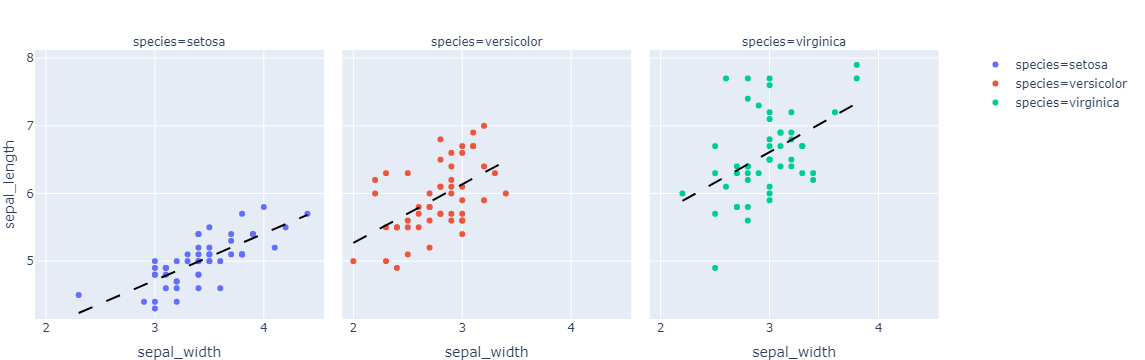

In [23]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length", \
                 color="species", facet_col="species", trendline="ols")

# update the trendline, select with selector
fig.update_traces(selector=dict(type="scatter", mode="lines"), 
                  line=dict(dash="longdash", width=2, color='black'))

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))

fig.show()

## For Each Trace
+ make change to a collection of traces, depending on current values
+ e.g. 
+ `for_each_trace`
  + taking a function
  + taking a `selector`
  + taking `row` and `col` of subplots

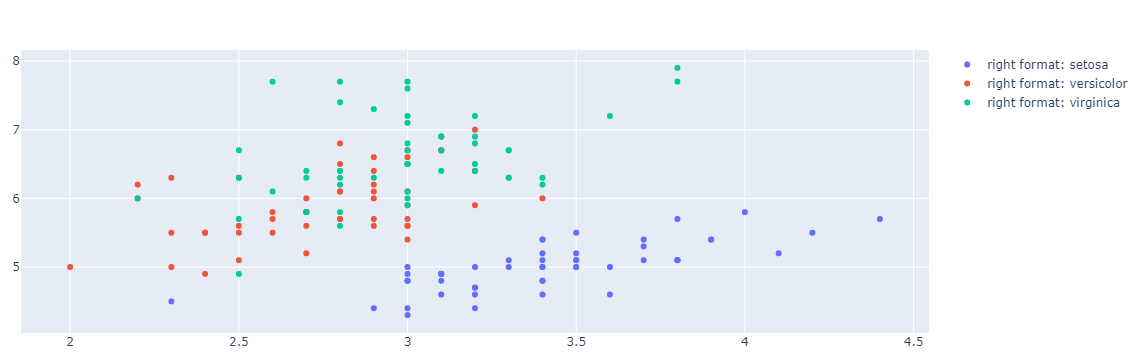

In [24]:
fig = go.Figure()

for i, species in enumerate(iris.species.unique()):
    a = iris[iris.species == species].sepal_width.values
    b = iris[iris.species == species].sepal_length.values
    fig.add_trace(go.Scatter(x=a, y=b, mode='markers', 
                             name=str('wrong format: ') + species))

# update each trace, replacing
# get the attribute with dot notation, update with method replace
fig.for_each_trace(
    lambda trace: trace.update(name=trace.name.replace("wrong", "right"))
    
)

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))
fig.show()

## Update Axes
+ `update_xaxes`
+ `update_yaxes`

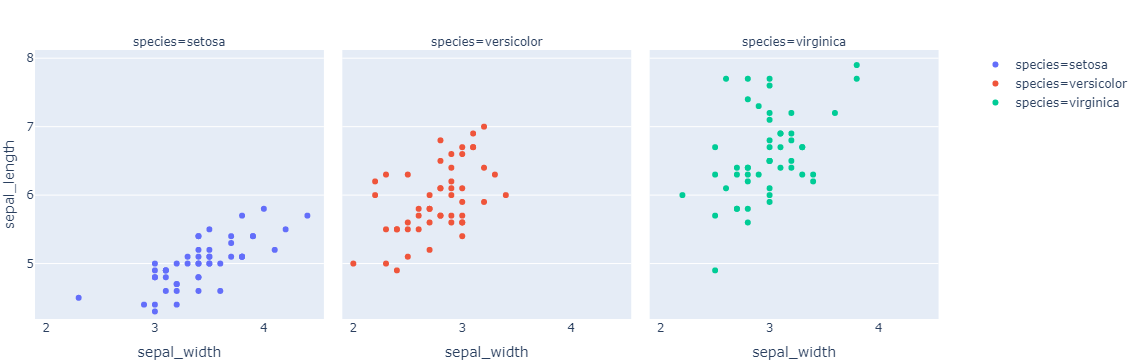

In [25]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species", facet_col="species")

# disable the grids on background
fig.update_xaxes(showgrid=False)

# set up plot layout
fig.update_layout(width=600, height=300, 
                  margin=dict(l=20, r=20, t=50, b=20))
fig.show()

## Chaining Operations

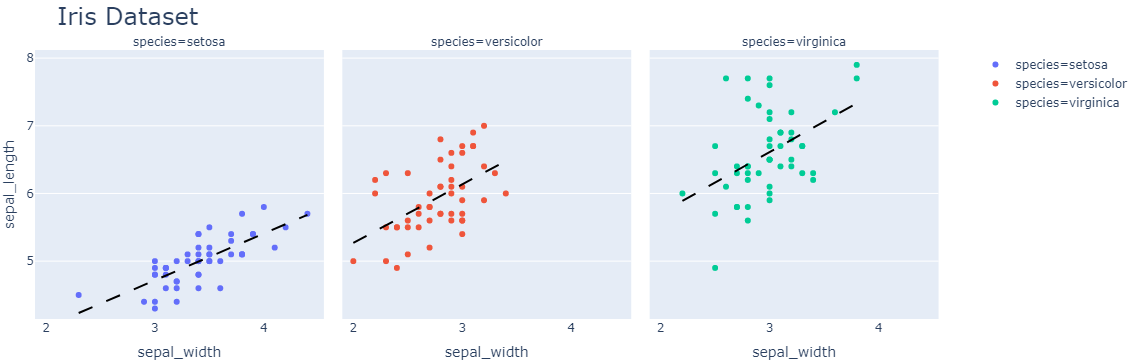

In [26]:
# chained operations
(px.scatter(iris, 
            x="sepal_width", y="sepal_length", 
            color="species", 
            facet_col="species", 
            trendline="ols", 
            title="Iris Dataset")
 .update_layout(title_font_size=24, 
                width=600, height=300, 
                margin=dict(l=20, r=20, t=50, b=20))
 .update_xaxes(showgrid=False)
 .update_traces(selector=dict(type="scatter", mode="lines"), 
                line=dict(dash="longdash", width=2, color='black'))
).show()

## Property Assignment with dots

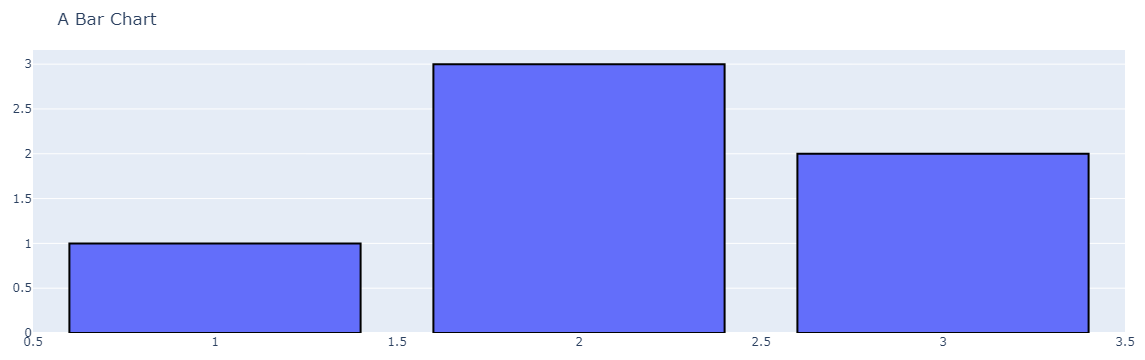

In [27]:
fig = go.Figure(data=go.Bar(x=[1, 2, 3], y=[1, 3, 2]))

fig.data[0].marker.line.width = 2
fig.data[0].marker.line.color = "black"

fig.layout.title.text = "A Bar Chart"
fig.layout.width = 600
fig.layout.height = 300
fig.layout.margin.l = 20
fig.layout.margin.r = 20
fig.layout.margin.t = 50
fig.layout.margin.b = 20

fig.show()